In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

## CONCEPTO DE REGRESION LINEAL

## CASO HOUSING

* Se usará el dataset publico https://www.kaggle.com/datasets/camnugent/california-housing-prices
* Se aplicarán los siguientes pasos
** EDA
** Data Cleaning & Feature Engineering
** Pipelines
** Regresión Lineal
** Metricas

In [ ]:
#leer el dataset
housing = pd.read_csv('/content/housing.csv')
#ver el tamaño
housing.shape

(20640, 10)

In [ ]:
#cabecera
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## EDA

In [ ]:
#valores de columnas y nulos
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# ver el target - valor
housing['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
352500.0      1
465000.0      1
457500.0      1
261200.0      1
307900.0      1
Name: count, Length: 3842, dtype: int64

In [ ]:
#ver la variable categorica
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# estadisticas descriptivas
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

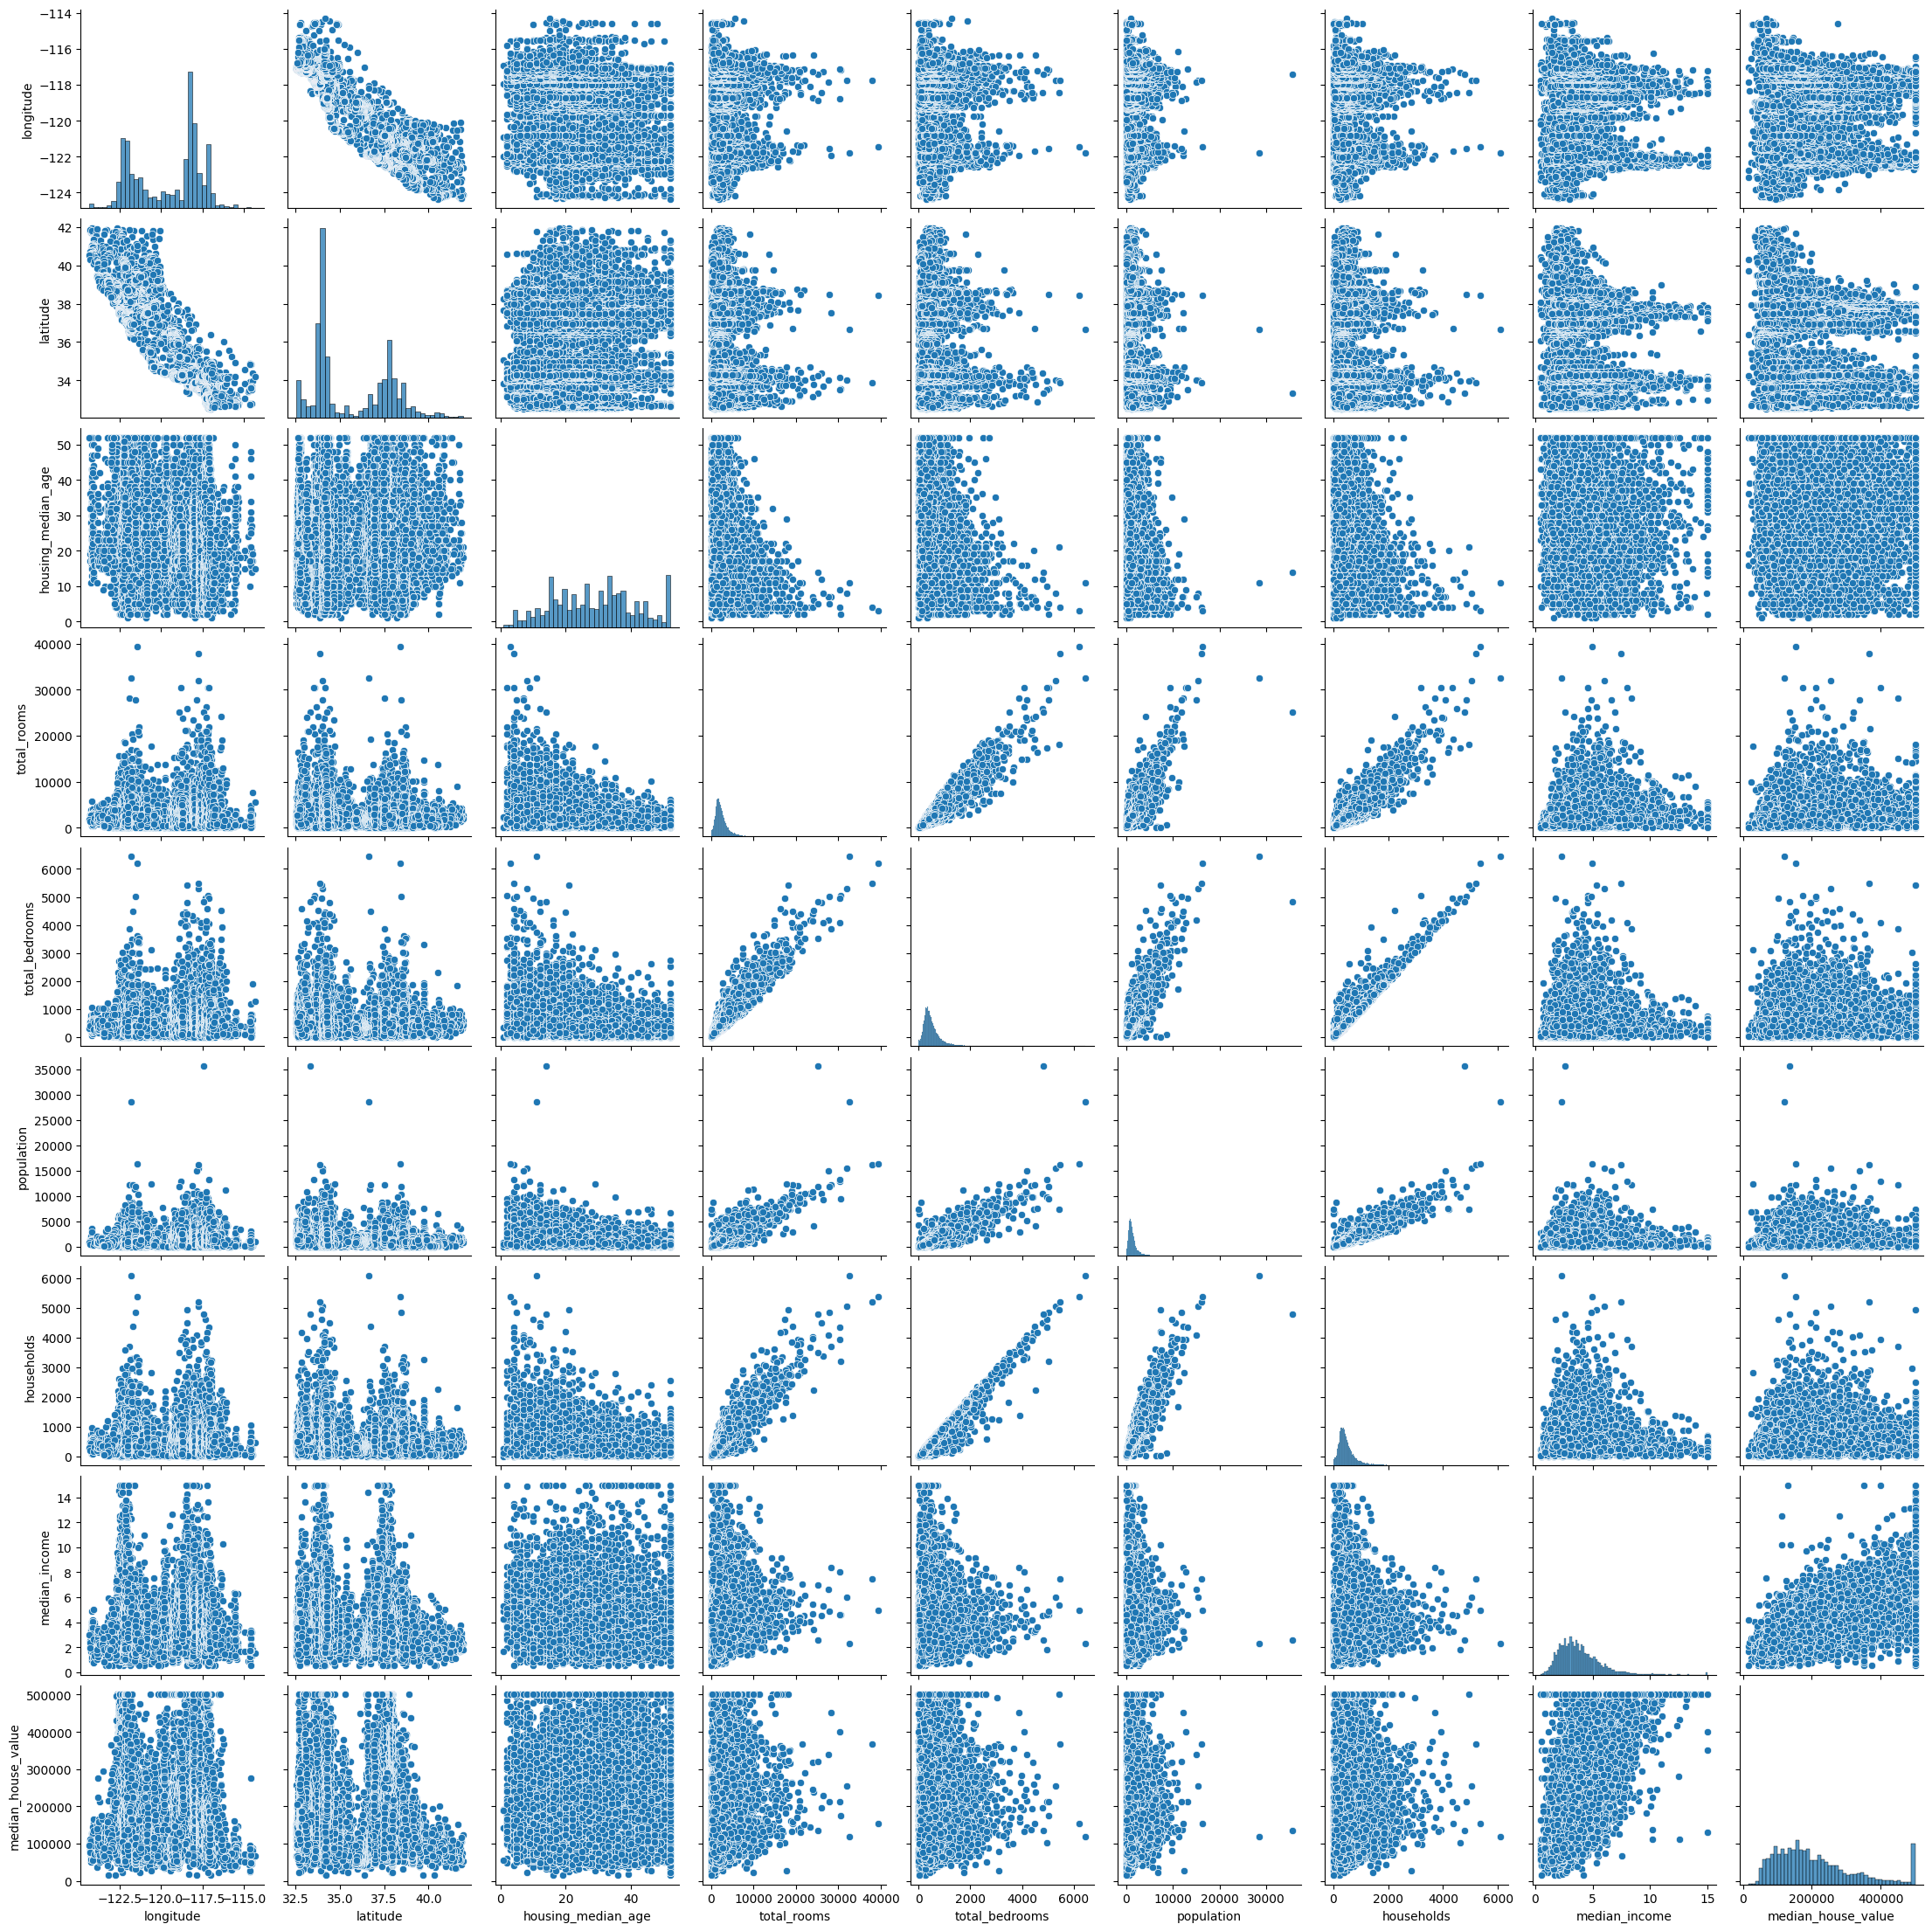

In [ ]:
#hagamos un ploteo de todos los datos con seaborn
sns.pairplot(housing)

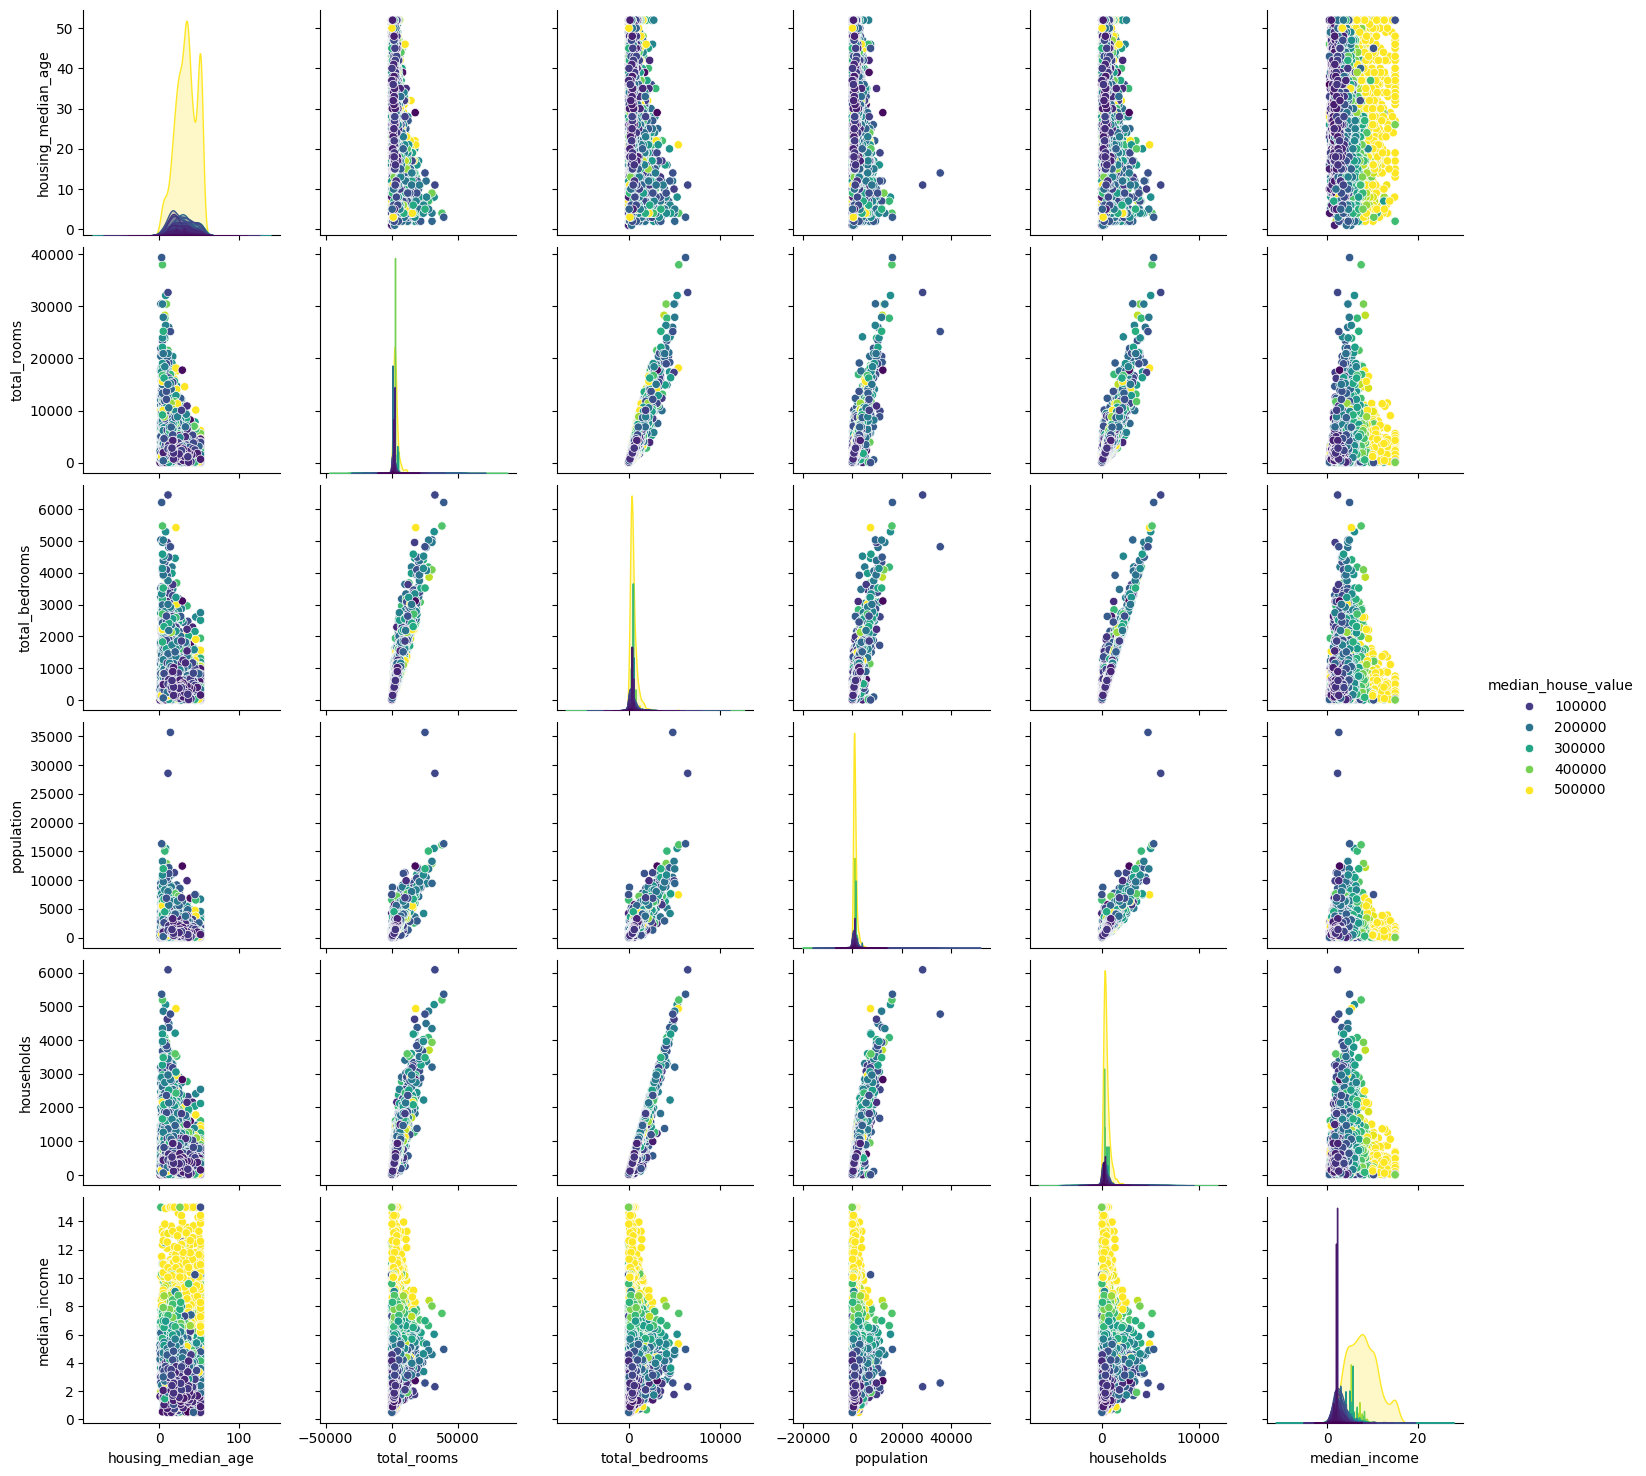

In [ ]:
#ajustes - quitamos las coordenadas y aplicamos un hue
feats = housing.iloc[:,2:]
sns.pairplot(feats, hue="median_house_value", palette="viridis")

<Axes: xlabel='median_income', ylabel='Count'>

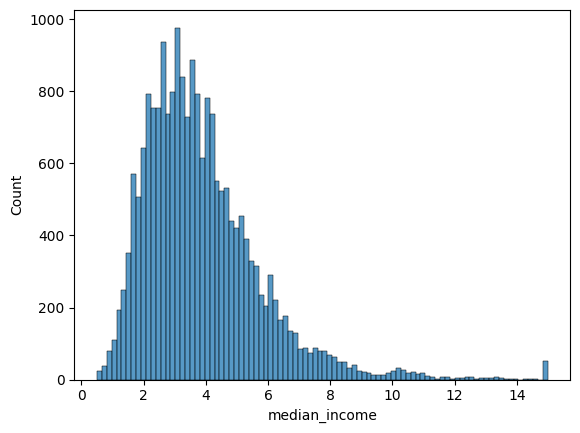

In [ ]:
#ver algunos histogramas individuales - median income
sns.histplot(data=housing, x='median_income')

<Axes: xlabel='housing_median_age', ylabel='Count'>

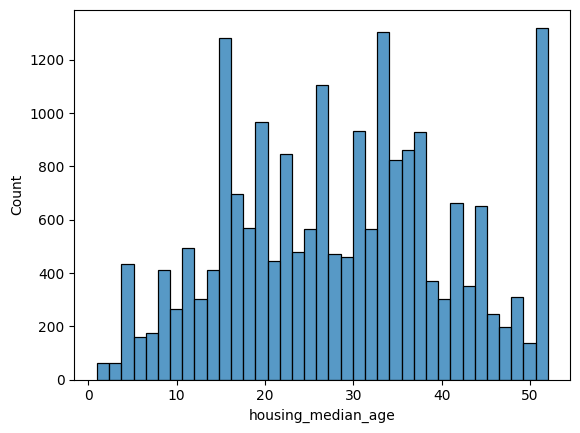

In [ ]:
#ver algunos histogramas individuales - housing median age
sns.histplot(data=housing, x='housing_median_age')

<Axes: xlabel='median_house_value', ylabel='Count'>

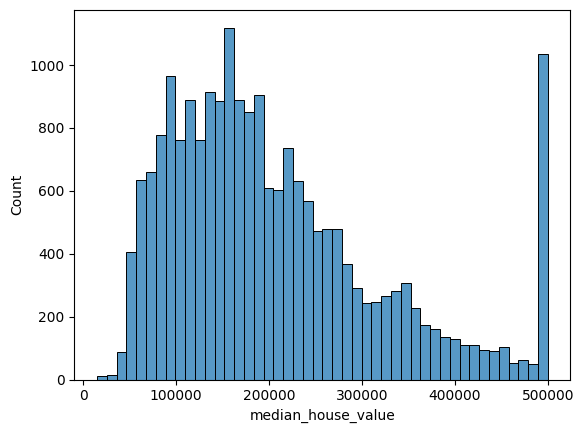

In [ ]:
#ver algunos histogramas individuales - median house value
sns.histplot(data=housing, x='median_house_value')

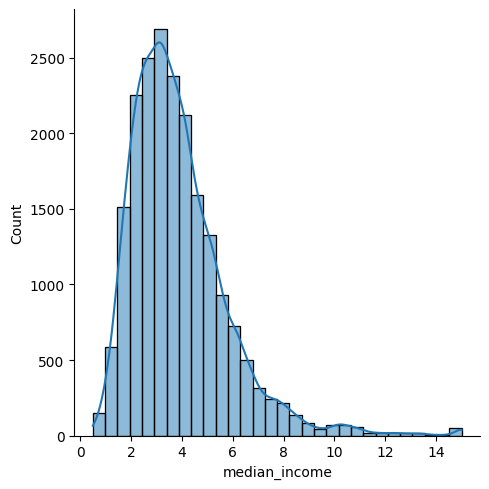

In [ ]:
#analicemos la separación de datos - primero trabajemos con median income
sns.displot(data=housing, x='median_income', bins=30, kde=True)

In [ ]:
#para identificar categorías posibles - redondear
np.ceil(housing["median_income"]/1.5)

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: median_income, Length: 20640, dtype: float64

In [ ]:
#supongamos que queremos crear 5 categorías de ingresos
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"]=housing["income_cat"].apply(lambda x: 5 if x>5 else x)

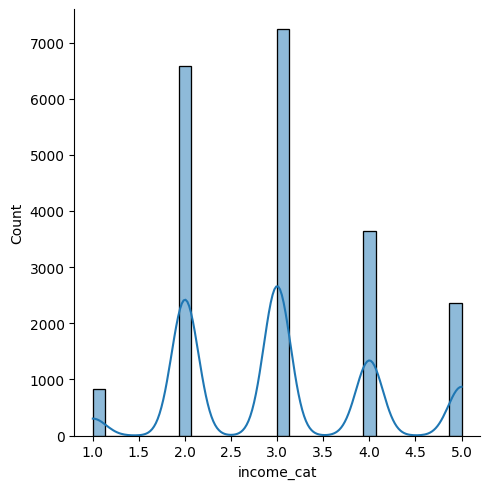

In [ ]:
#esto tendría la siguiente forma
sns.displot(data=housing, x='income_cat', bins=30, kde=True)

## TRAIN TEST SPLIT

In [ ]:
#1. separación regular train - test, observar el uso de seed para reproducir
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
housing.shape

(20640, 11)

In [ ]:
train_set.shape

(16512, 11)

In [ ]:
test_set.shape

(4128, 11)

In [ ]:
test_set["income_cat"].value_counts()

income_cat
3.0    1480
2.0    1339
4.0     691
5.0     452
1.0     166
Name: count, dtype: int64

In [ ]:
#1. proporciones en el caso regular para income_cat
test_set["income_cat"].value_counts() / len(test_set)

income_cat
3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: count, dtype: float64

In [ ]:
# 2. separación estratificada train - test, observar el uso de seed para \
# reproducir
strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=1516
    )

In [ ]:
#2. proporciones en el caso stratify para income_cat
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [ ]:
#3. proporciones para el dataset regular
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [ ]:
data = {
'TOTAL': housing["income_cat"].value_counts() / len(housing),
'TEST': test_set["income_cat"].value_counts() / len(test_set),
'STRAT': strat_test_set["income_cat"].value_counts() / len(strat_test_set)
}

In [ ]:
#creamos un dataframe
res = pd.DataFrame(data)
res['DIFF_TEST (%)'] = ((res['TOTAL'] - res['TEST'])/res['TOTAL'])*100
res['STRAT_TEST (%)'] = ((res['TOTAL'] - res['STRAT'])/res['TOTAL'])*100

In [ ]:
#podemos apreciar que stratified respeta mejor las proporciones
res

TOTAL      TEST     STRAT  DIFF_TEST (%)  STRAT_TEST (%)
income_cat                                                             
3.0         0.350581  0.358527  0.350533      -2.266446        0.013820
2.0         0.318847  0.324370  0.318798      -1.732260        0.015195
4.0         0.176308  0.167393  0.176357       5.056334       -0.027480
5.0         0.114438  0.109496  0.114341       4.318374        0.084674
1.0         0.039826  0.040213  0.039971      -0.973236       -0.364964

In [ ]:
#si bien sirvió para la prueba - borramos la columna antes de continuar
datasets = [strat_train_set, strat_test_set]
for dataset in datasets:
    dataset = dataset.drop('income_cat', axis=1, inplace=True)

In [ ]:
#validamos
strat_train_set.shape

(16512, 10)

In [ ]:
strat_test_set.shape

(4128, 10)

## EDA II

In [ ]:
#hacer copia para poder revertir
housing.shape

(20640, 10)

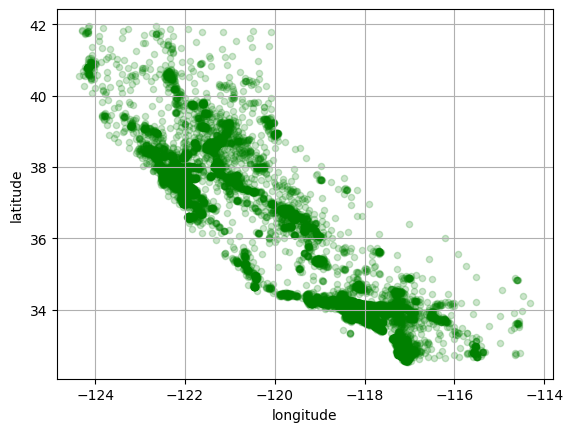

In [ ]:
#aprovechemos las coordenadas para visualizar la geografía de las viviendas
#gracias a alpha vemos densidad
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2, color='green')
plt.show()

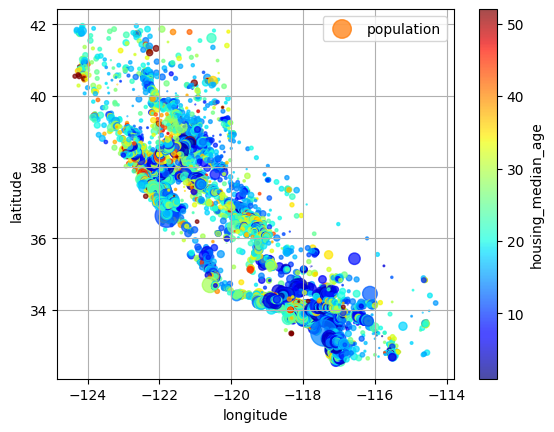

In [ ]:
#probemos visualizar las edades
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.7,
         s=housing["population"]/100, label="population",
         c="housing_median_age", cmap=plt.get_cmap("jet"),
         grid=True, colorbar=True)
plt.legend()

In [ ]:
housing_corr = housing.drop("ocean_proximity", axis=1)

In [ ]:
#busquemos correlaciones
corr_matrix = housing_corr.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

<Axes: >

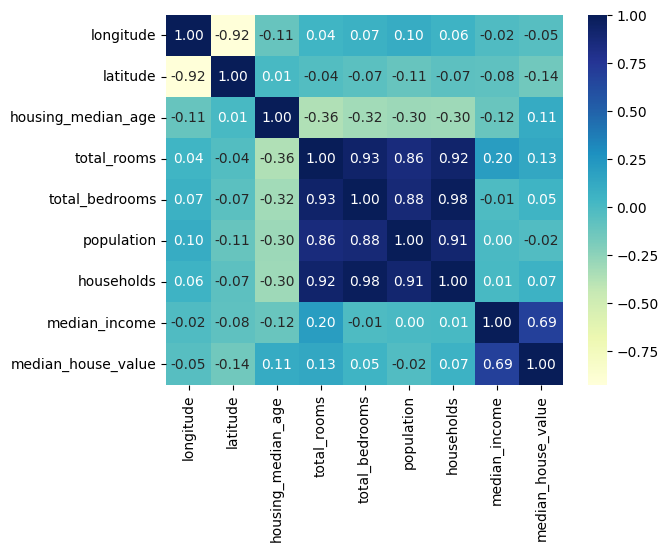

In [ ]:
#quizas el mapa de calor de seaborn sea útil
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt='.2f')

<Axes: xlabel='median_income', ylabel='median_house_value'>

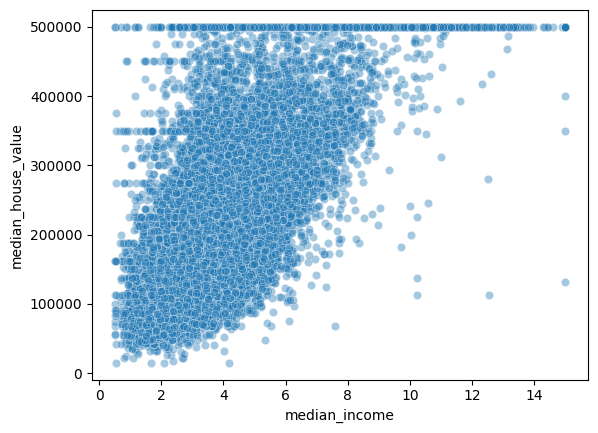

In [ ]:
#median_income es claramente importante, visualicemos de nuevo
sns.scatterplot(data=housing, y="median_house_value", x="median_income", alpha=0.4)

## DATA CLEANING & FEATURE ENGINEERING

In [ ]:
#separamos los datos en atributos y etiquetas
X = strat_train_set.drop("median_house_value",axis=1)
X.shape

(16512, 9)

In [ ]:
y = strat_train_set["median_house_value"].copy()
y.head()

16559    119400.0
8169     249200.0
1597     279500.0
14511    174800.0
12832    112200.0
Name: median_house_value, dtype: float64

### VALORES VACIOS

In [ ]:
#recordemos que hay valores vacíos
X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        161
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
#podemos usar la imputación de scikit-learn - hay otras tecnicas investigar
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [ ]:
#vamos a crear una versión sin categorias
X_num=X.drop("ocean_proximity",axis=1)
imputer.fit(X_num)

SimpleImputer()

In [ ]:
#resultados
imputer.statistics_

array([-119.56973232,   35.63337209,   28.6189438 , 2632.89135174,
        537.41202373, 1423.65891473,  499.15285853,    3.86814101])

In [ ]:
#aplicar los cambios
X_arr = imputer.transform(X_num)

In [ ]:
#volver a validar - creamos otro df
X_full = pd.DataFrame(X_arr, columns=X_num.columns,
                          index=X_num.index)

In [ ]:
#exitos
X_full.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### DATOS CATEGORICOS

In [ ]:
#tenemos una columna categorica
X['ocean_proximity'].describe()

count         16512
unique            5
top       <1H OCEAN
freq           7284
Name: ocean_proximity, dtype: object

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

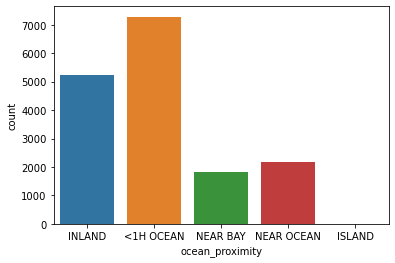

In [ ]:
#visualizar
sns.countplot(x="ocean_proximity", data=X)

In [ ]:
#ya que las categorias se procesan mejor como numeros, hagamos la transformación
#usaremos para esto el one hot encoder
from sklearn.preprocessing import OneHotEncoder
X_cat = X['ocean_proximity'].values
encoder = OneHotEncoder()
X_hot = encoder.fit_transform(X_cat.reshape(-1,1))
X_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### NORMALIZACION

In [ ]:
#obtengamos las variables numericas
housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
#ahora aplicar describe - ver como los valores varían mucho
housing_num.describe().T.round(2)

count       mean        std       min        25%  \
longitude           16512.0    -119.57       2.01   -124.35    -121.80   
latitude            16512.0      35.63       2.14     32.54      33.93   
housing_median_age  16512.0      28.62      12.64      1.00      18.00   
total_rooms         16512.0    2632.89    2201.79      2.00    1447.00   
total_bedrooms      16351.0     537.41     423.12      1.00     296.00   
population          16512.0    1423.66    1121.12      3.00     784.00   
households          16512.0     499.15     383.26      1.00     279.00   
median_income       16512.0       3.87       1.90      0.50       2.56   
median_house_value  16512.0  206720.22  115116.39  14999.00  120000.00   

                          50%        75%        max  
longitude             -118.49    -118.00    -114.47  
latitude                34.25      37.72      41.95  
housing_median_age      29.00      37.00      52.00  
total_rooms           2122.00    3144.25   39320.00  
total_bedrooms         434.00     646.00    6445.00  
population            1167.00    1718.00   28566.00  
households             409.00     605.00    6082.00  
median_income            3.53       4.75      15.00  
median_house_value  179500.00  264400.00  500001.00

In [ ]:
#ahora aplicar el StandardScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
scaled_df = pd.DataFrame(housing_num_std_scaled)

In [ ]:
#ahora aplicar describe - comparar con lo anterior
scaled_df.describe().T.round(2)

count  mean  std   min   25%   50%   75%    max
0  16512.0   0.0  1.0 -2.38 -1.11  0.54  0.78   2.54
1  16512.0   0.0  1.0 -1.44 -0.79 -0.65  0.97   2.95
2  16512.0  -0.0  1.0 -2.18 -0.84  0.03  0.66   1.85
3  16512.0  -0.0  1.0 -1.19 -0.54 -0.23  0.23  16.66
4  16351.0  -0.0  1.0 -1.27 -0.57 -0.24  0.26  13.96
5  16512.0  -0.0  1.0 -1.27 -0.57 -0.23  0.26  24.21
6  16512.0  -0.0  1.0 -1.30 -0.57 -0.24  0.28  14.57
7  16512.0   0.0  1.0 -1.77 -0.69 -0.18  0.46   5.86
8  16512.0   0.0  1.0 -1.67 -0.75 -0.24  0.50   2.55

## PIPELINE

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [ ]:
#en lugar de hacer todos estos pasos uno a uno podemos usar pipelines para ordenar el procesamiento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs=list(X_num)
cat_attribs=["ocean_proximity"]

num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("feature_adder",FeatureAdder()),
    ("std_scaler",StandardScaler()),
])

full_pipeline=ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [ ]:
X_ml = full_pipeline.fit_transform(X)

## REGRESION LINEAL

### SIMPLE

In [ ]:
#en simple no haremos mayores cambios

In [ ]:
#elegimos una variable X
X = housing[['median_income']]  # features/caracteristicas
y = housing['median_house_value']  # target/objetivo

In [ ]:
# Separacion/division del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, # data de median income
                                                    y, # data median house value
                                                    test_size=0.2, # dimension de muestra
                                                    random_state=42)# estado de aleatoriedad

In [ ]:
print("Features (solo es una feat en este caso):")
print(len(X_train))
print(len(X_test))
print("==========")
print("Target:")
print(len(y_train))
print(len(y_test))

Features (solo es una feat en este caso):
16512
4128
Target:
16512
4128


In [ ]:
# instanciar la clase de regresion lineal
lin_reg = LinearRegression()
# aplicar el metodo fit
lin_reg.fit(X_train, y_train)  # solo a la data de entrenamiento

LinearRegression()

In [ ]:
# en una variable 'pred' voy a almacenar las predicciones del conjunto de entrenamiento
y_pred = lin_reg.predict(X_test)

In [ ]:
y_pred

array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

In [ ]:
#MSE
final_mse = mean_squared_error(y_test, y_pred)
final_mse

7091157771.76555

In [ ]:
# Roor Mean Squar Error
final_rmse = np.sqrt(final_mse)
final_rmse

84209.01241414454

In [ ]:
# Metrica de la version 1.4 de Sklearn
metrica_v_1_4 = root_mean_squared_error(y_test, y_pred)
metrica_v_1_4

84209.01241414454

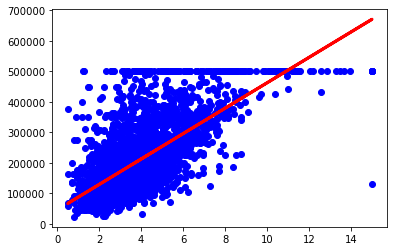

In [ ]:
import matplotlib.pyplot as plt
#plot de la línea de regresión
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test.values, pred, color="red", linewidth=3)

## MULTIPLE

![image.png](attachment:image.png)

In [ ]:
#en multiple haremos feature engineering con el pipeline

In [ ]:
#con TEST!
X_test= strat_test_set.drop("median_house_value",axis=1)
y_test= strat_test_set["median_house_value"].copy()

In [ ]:
#usar el pipeline para transformar todo
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_ml,y)

LinearRegression()

In [ ]:
pred = lin_reg.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
#RMSE
final_mse = mean_squared_error(y_test,pred)
final_rmse =np.sqrt(final_mse)

In [ ]:
final_rmse

70134.1457452785

## PRACTICA

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
#1. Usar la data original de housing y quedarse solo con latitud y longitud
housing = pd.read_csv('housing.csv')
housing.shape

(20640, 10)

In [ ]:
coord = housing[['latitude', 'longitude']]
coord.sample(3)

latitude  longitude
12471     38.58    -121.46
5265      34.05    -118.54
9174      34.39    -118.52

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

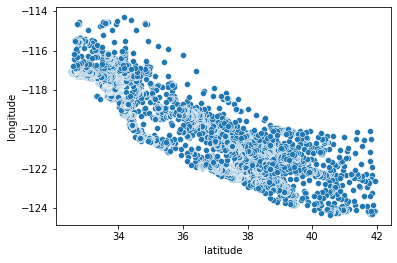

In [ ]:
#2. Crear una gráfica de dispersión entre ambas variables
sns.scatterplot(data=coord, x='latitude', y='longitude')

In [ ]:
#3. Buscamos predecir la latitud.
#Llevar a cabo la separación train/test, con un 20% para test, random_seed=1516
from sklearn.model_selection import train_test_split
y = coord.latitude
X = coord.longitude.to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1516)

In [ ]:
X.shape

(20640, 1)

In [ ]:
y.shape

(20640,)

In [ ]:
#4. Llevar a cabo la regresión lineal simple
#a) Evaluar con R2
#b) Mostrar la intercepción y el coeficiente
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
rcuad = r2_score(y_test,pred)
print('R CUADRADO: {}'.format(rcuad))
print('Intercepción: {}'.format(lin_reg.intercept_))
print('Coeficiente: {}'.format(lin_reg.coef_))

R CUADRADO: 0.8516789526840453
Intercepción: -82.31443824751364
Coeficiente: [-0.98642527]


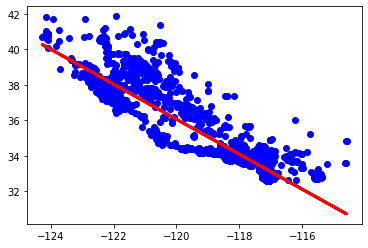

In [ ]:
#5. Plotear los datos e incorporar la línea de regresión
import matplotlib.pyplot as plt
#plot de la línea de regresión
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test.values, pred, color="red", linewidth=3)